# <a id='toc1_'></a>Phân tích dữ liệu, Exploratory data analysis (EDA) [&#128522;](#toc0_)

**Nội dung, Table of contents**<a id='toc0_'></a>    
- [Phân tích dữ liệu, Exploratory data analysis (EDA)](#toc1_)    
    - [Thiết lập, Setup](#toc1_1_1_)    
    - [Nhập thư viện cần thiết, Importing libraries](#toc1_1_2_)    
    - [Đọc dữ liệu từ tệp Excel, Reading Data from Excel File](#toc1_1_3_)    
    - [Khôi phục ngày gốc, Original Date Restoration from Text](#toc1_1_4_)    
    - [Chuyển đổi và tiêu chuẩn hóa dữ liệu, Data Type Conversion and Standardization](#toc1_1_5_)    
    - [Trực quan hóa số lượng bình luận theo thời gian, Visualizing Comment Counts Over Time](#toc1_1_6_)    
    - [Phân phối độ dài bình luận, Analyzing Comment Length Distribution](#toc1_1_7_)    
    - [Lọc và hiển thị thông tin người dùng, User Information Filtering and Display](#toc1_1_8_)    
    - [Tính số lượng và tỷ lệ người dùng, Unique User Count Calculation and Ratio](#toc1_1_9_)    
    - [Lọc và trực quan hóa tiêu đề (danh hiệu) người dùng, Filtering User Data by Title and Visualization](#toc1_1_10_)    
    - [Phân tích năm tham gia, Analyzing Join Year Distribution](#toc1_1_11_)    
    - [Phân tích tổng số bình luận của từng người dùng trên diễn đàn <br>Analysis of Total Comments by Each User the Forum](#toc1_1_12_)    
    - [Thống kê tóm tắt về số điểm phản ứng, Summary Statistics of User Reactions](#toc1_1_13_)    
    - [Xử lý ngoại lai của số điểm phản ứng, Handling Outliers in User Reaction Counts](#toc1_1_14_)    
    - [Phân phối số điểm phản ứng sau khi xử lý ngoại lai, User Reaction Data After Outlier Handling](#toc1_1_15_)    
    - [Tạo DataFrame từ các JSON Key, Creating a DataFrame from Selected JSON Keys](#toc1_1_16_)    
    - [Phân tích độ dài bình luận, Analyzing Comment Length Distribution](#toc1_1_17_)    
    - [Trực quan hóa số lượng từng danh mục, Category Distribution Visualization](#toc1_1_18_)    
    - [Phân phối danh mục bằng biểu đồ tròn, Category Distributions in Pie Charts](#toc1_1_19_)    
    - [Phân tích cân bằng các lớp bằng biểu đồ, Analyzing Class Imbalance with Charts](#toc1_1_20_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_1_'></a>Thiết lập, Setup [&#128522;](#toc0_)

In [1]:
# ### python environment (venv, virtualenv)
# %pip install numpy==1.25.2
# %pip install pandas==2.1.0
# %pip install matplotlib==3.7.2
# %pip install seaborn==0.12.2
# ### conda environment (miniconda, anaconda)
# %conda install numpy==1.25.2
# %conda install pandas==2.1.0
# %conda install matplotlib==3.7.2
# %conda install seaborn==0.12.2

### <a id='toc1_1_2_'></a>Nhập các thư viện, Importing libraries [&#128522;](#toc0_)

In [2]:
import json
import re
import warnings
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')
np.random.seed(42)
sns.set()

### <a id='toc1_1_3_'></a>Đọc dữ liệu từ tệp Excel, Reading Data from Excel File [&#128522;](#toc0_)

In [3]:
df = pd.read_excel('done.xlsx')
df.sample(5)

,comment_date,comment,username,usertitle,join_date,message_counts,reactions_counts,points
3846,"Feb 16, 2022","Mấy bác cho hỏi về vụ test máy, em vừa mua con...",wasabi9293,Senior Member,"Mar 14, 2014","5,072","4,601",113.0
6622,"Apr 6, 2023",Trước nghe con tensor mới có vẻ ngon ai ngờ là...,tvtkhoi,Senior Member,"Dec 22, 2022",310,68,28.0
1515,"Jun 24, 2021","Ram hơn, giờ mình nghĩ máy Android để mà dùng ...",chuongngd,Senior Member,"Nov 9, 2007","2,305","2,653",113.0
3792,"Jan 28, 2022",Bác dùng máy gì android bản nào\n\nBảo Long nh...,Yang Yena,Senior Member,"May 29, 2021","1,071",952,113.0
3790,"Jan 27, 2022","Lâu ngày dùng lại Android, làm sao để màn hình...",Miasnaer1,Member,"Aug 6, 2021",713,"1,290",93.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7479 entries, 0 to 7478
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   comment_date      7479 non-null   object 
 1   comment           7457 non-null   object 
 2   username          7461 non-null   object 
 3   usertitle         7461 non-null   object 
 4   join_date         7461 non-null   object 
 5   message_counts    7461 non-null   object 
 6   reactions_counts  7461 non-null   object 
 7   points            7461 non-null   float64
dtypes: float64(1), object(7)
memory usage: 467.6+ KB


### <a id='toc1_1_4_'></a>Khôi phục ngày gốc, Original Date Restoration from Text [&#128522;](#toc0_)

In [5]:
def replace_to_original_date(text):
    saturday_pattern =r'^Saturday.*'
    sunday_pattern =r'^Sunday.*'
    monday_pattern =r'^Monday.*'
    tuesday_pattern =r'^Tuesday.*'
    wednesday_pattern =r'^Wednesday.*'
    yesterday_pattern =r'^Yesterday.*'
    today_pattern =r'^Today.*'
    if re.match(saturday_pattern, text):
        return 'Aug 26, 2023'
    if re.match(sunday_pattern, text):
        return 'Aug 27, 2023'
    if re.match(monday_pattern, text):
        return 'Aug 28, 2023'
    if re.match(tuesday_pattern, text):
        return 'Aug 29, 2023'
    if re.match(wednesday_pattern, text):
        return 'Aug 30, 2023'
    if re.match(yesterday_pattern, text):
        return 'Aug 31, 2023'
    if re.match(today_pattern, text):
        return 'Sep 1, 2023'
    return text

# Apply the function to the 'Text' column of the DataFrame
df['comment_date'] = df['comment_date'].apply(replace_to_original_date)

In [6]:
df.sample(5)

,comment_date,comment,username,usertitle,join_date,message_counts,reactions_counts,points
3525,"Dec 19, 2021",Nghe mấy bác review pin hẻo quá nên không xúc ...,Người Dân Đảo Dừa no.1,Senior Member,"Oct 3, 2021",358,447,63.0
6934,"Jun 12, 2023",Pixel 6 Pro thì giờ dán màn hình loại nào vậy ...,health,Senior Member,"May 29, 2021","4,406","1,705",113.0
3214,"Nov 13, 2021","hà nội có chỗ nào thay pin pixel 2 ko nhỉ, hỏi...",connhangheopx,Đã tốn tiền,"Dec 27, 2012",348,19,18.0
4462,"May 28, 2022",Loa nghe có nhỏ quá ko bác?,Quang 8.3,Junior Member,"May 4, 2021",53,22,8.0
571,"Mar 16, 2021",Trên dưới 4tr tùy ngoại hình\nTất cả các đời P...,daigiacon_dn,Đã tốn tiền,"Nov 25, 2008",832,176,43.0


### <a id='toc1_1_5_'></a>Chuyển đổi và tiêu chuẩn hóa dữ liệu, Data Type Conversion and Standardization [&#128522;](#toc0_)

In [7]:
def convert_to_ymd(date_str):
    if date_str is np.nan:
        return np.nan
    date_obj = datetime.strptime(str(date_str), '%b %d, %Y')
    return date_obj.strftime('%Y-%m-%d')

def convert_to_int(text):
    if text is np.nan:
        return 0
    return int(str(text).replace(',', ''))

# Apply the convert_to_ymd to the 'comment_date', 'join_date' column
df['comment_date'] = df['comment_date'].apply(convert_to_ymd)
df['join_date'] = df['join_date'].apply(convert_to_ymd)

# Apply the convert_to_int to the 'mesage_counts', 'reactions_counts' column
df['message_counts'] = df['message_counts'].apply(convert_to_int)
df['reactions_counts'] = df['reactions_counts'].apply(convert_to_int)
df.sample(5)

,comment_date,comment,username,usertitle,join_date,message_counts,reactions_counts,points
856,2021-05-07,px3 làm thế nào để bóp nó ra chức năng ...,KoDoThey,Senior Member,2012-12-15,4684,606,113.0
936,2021-05-23,nhớ review từ đầu đến đít luôn nhé\nmà h Pixel...,WENBIE,Member,2007-10-21,43829,9926,113.0
1678,2021-07-09,Mình coi lại rồi. Hình như chỉ free khi upload...,jrnguyen87,Senior Member,2014-08-27,243,82,28.0
3971,2022-03-10,mua pixel 6 lock mỹ hoặc nhật về VN unlock dc ...,zoodkool,Junior Member,2014-09-20,160,13,18.0
920,2021-05-20,Pixel có cách nào chụp màn hình home được k cá...,Vợ bạn,Junior Member,2020-11-17,63,44,18.0


### <a id='toc1_1_6_'></a>Trực quan hóa số lượng bình luận theo thời gian, Visualizing Comment Counts Over Time [&#128522;](#toc0_)

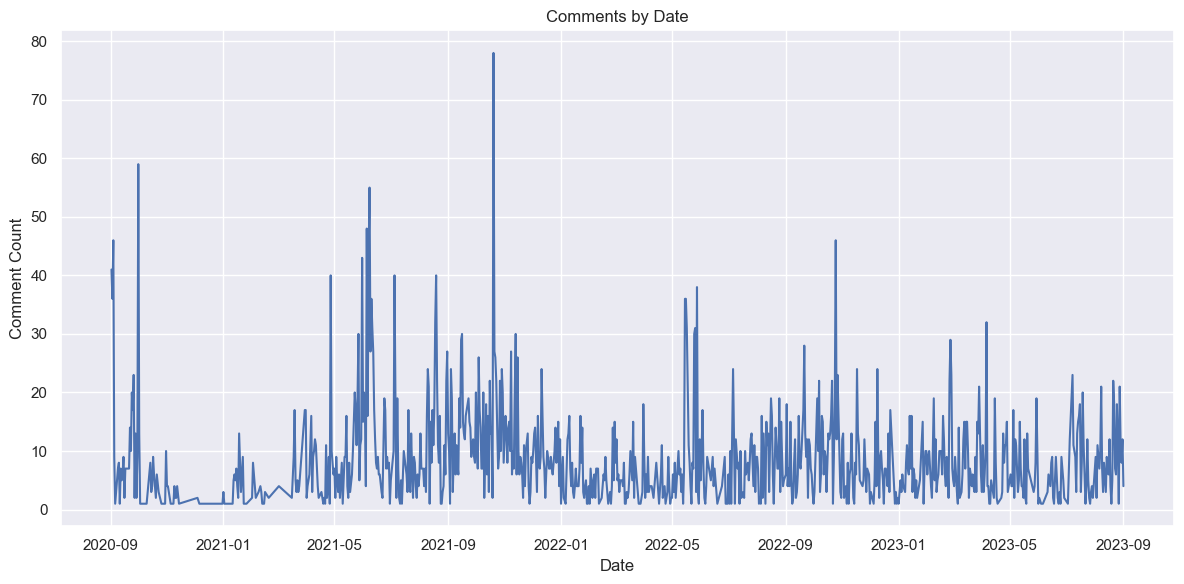

In [8]:
df['comment_date'] = pd.to_datetime(df['comment_date'])
comments_by_date = df.groupby('comment_date').size().reset_index(name='comment_count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=comments_by_date, x='comment_date', y='comment_count')
plt.xlabel('Date')
plt.ylabel('Comment Count')
plt.title('Comments by Date')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


### <a id='toc1_1_7_'></a>Phân phối độ dài bình luận, Analyzing Comment Length Distribution [&#128522;](#toc0_)

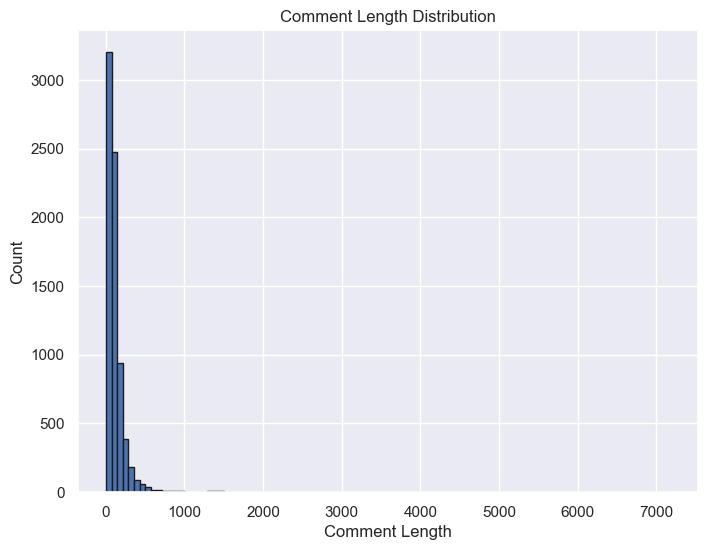

In [9]:
plt.figure(figsize=(8, 6))
plt.hist(df['comment'].apply(lambda x: len(str(x))), bins=100, edgecolor='k')
plt.title('Comment Length Distribution')
plt.xlabel('Comment Length')
plt.ylabel('Count')
plt.show()


### <a id='toc1_1_8_'></a>Lọc và hiển thị thông tin người dùng, User Information Filtering and Display [&#128522;](#toc0_)

In [10]:
df_user = df[['username', 'usertitle', 'join_date', 'message_counts', 'reactions_counts','points']]
print(df_user.info())
df_user.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7479 entries, 0 to 7478
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   username          7461 non-null   object 
 1   usertitle         7461 non-null   object 
 2   join_date         7461 non-null   object 
 3   message_counts    7479 non-null   int64  
 4   reactions_counts  7479 non-null   int64  
 5   points            7461 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 350.7+ KB
None


,username,usertitle,join_date,message_counts,reactions_counts,points
0,REALMADRIDno1,Senior Member,2014-09-17,998,422,83.0
1,REALMADRIDno1,Senior Member,2014-09-17,998,422,83.0
2,lon_ton_sai_vat,Đã tốn tiền,2006-07-24,11155,6161,113.0
3,rangeri,Senior Member,2009-08-06,3684,2819,113.0
4,rangeri,Senior Member,2009-08-06,3684,2819,113.0


### <a id='toc1_1_9_'></a>Tính số lượng và tỷ lệ người dùng, Unique User Count Calculation and Ratio [&#128522;](#toc0_)

In [11]:
# remove duplicate usernames
df_user.drop_duplicates(subset="username", inplace=True)
# get number of unique usernames
num_unique_usernames = len(df_user["username"].unique())
print("Số lượng người dùng tham gia bình luận:", num_unique_usernames)
print(
    "Tỷ lệ % số người bình luận trong tổng số bình luận:",
    num_unique_usernames / len(df),
)

Số lượng người dùng tham gia bình luận: 1208
Tỷ lệ % số người bình luận trong tổng số bình luận: 0.16151891964166332


### <a id='toc1_1_10_'></a>Lọc và trực quan hóa tiêu đề (danh hiệu) người dùng, Filtering User Data by Title and Visualization [&#128522;](#toc0_)

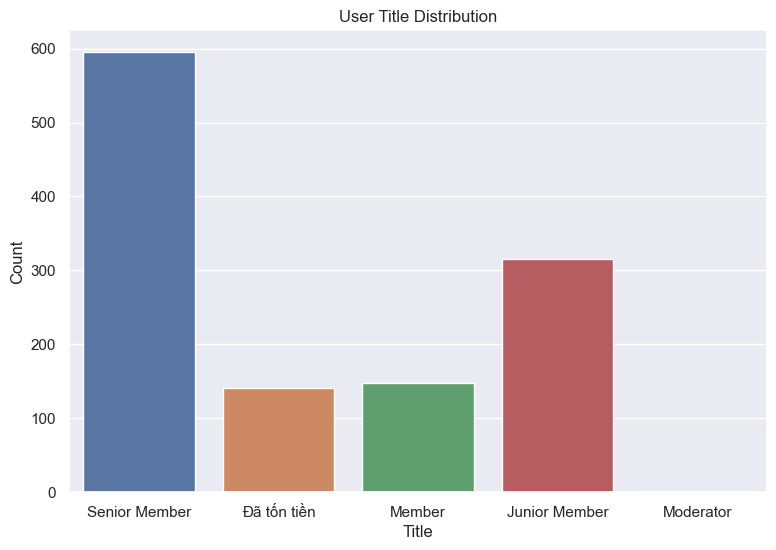

In [12]:
# Filter the DataFrame to include only 'Member', 'Senior Member' titles
filtered_df = df_user[
    df_user["usertitle"].isin(
        ["Junior Member", "Member", "Senior Member", "Đã tốn tiền", "Moderator"]
    )
]
# Visualize the filtered DataFrame
# Create a countplot using Seaborn for the filtered DataFrame
plt.figure(figsize=(9, 6))  # Optional: Set the figure size
sns.countplot(data=filtered_df, x='usertitle')
# sns.countplot(data=df_user, x="usertitle")

# Set labels and title
plt.xlabel("Title")
plt.ylabel("Count")
plt.title("User Title Distribution")

# Show the plot
plt.show()

### <a id='toc1_1_11_'></a>Phân tích năm tham gia, Analyzing Join Year Distribution [&#128522;](#toc0_)

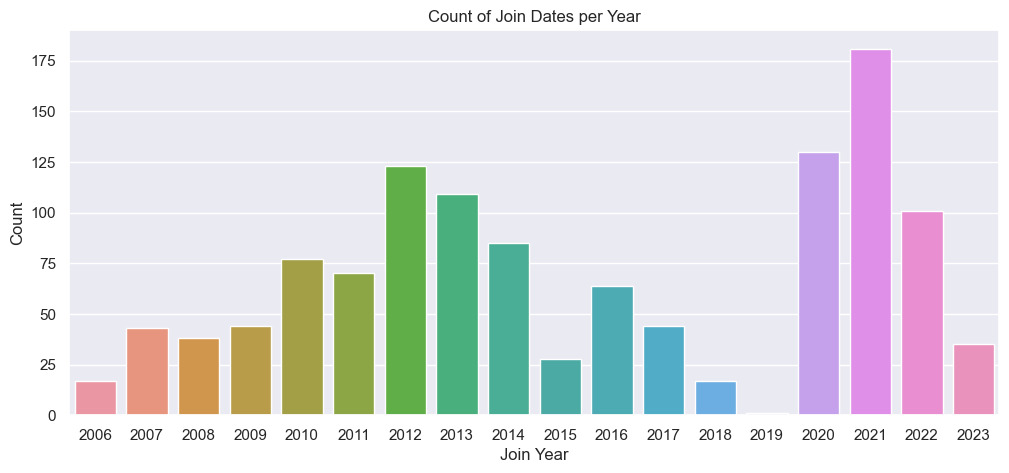

In [13]:
# Remove missing values from 'join_date'
filtered_df = df_user.dropna(subset=['join_date'])

# Convert 'join_date' to datetime
filtered_df['join_date'] = pd.to_datetime(filtered_df['join_date'])

# Extract the year from 'join_date'
filtered_df['join_year'] = filtered_df['join_date'].dt.year.astype(int)

# Create a countplot using Seaborn with 'join_year' on the x-axis
plt.figure(figsize=(12, 5))
sns.countplot(data=filtered_df, x='join_year')

# Set the x-axis tick positions and labels
plt.xticks(rotation=0)

# Set labels and title
plt.xlabel('Join Year')
plt.ylabel('Count')
plt.title('Count of Join Dates per Year')

# Show the plot
plt.show()


### <a id='toc1_1_12_'></a>Phân tích tổng số bình luận của từng người dùng trên diễn đàn <br>Analysis of Total Comments by Each User the Forum [&#128522;](#toc0_)

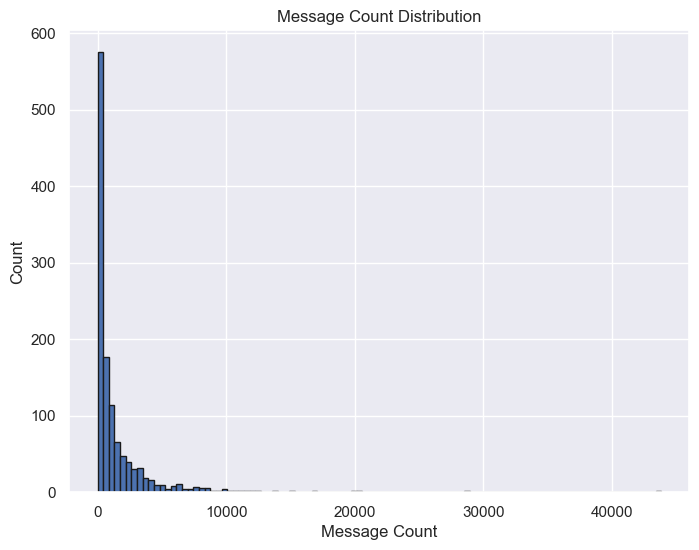

In [14]:
plt.figure(figsize=(8, 6))
plt.hist(df_user['message_counts'], bins=100, edgecolor='k')
plt.title('Message Count Distribution')
plt.xlabel('Message Count')
plt.ylabel('Count')
plt.show()

### <a id='toc1_1_13_'></a>Thống kê tóm tắt về số điểm phản ứng, Summary Statistics of User Reactions [&#128522;](#toc0_)

In [15]:
df_user['reactions_counts'].describe()

count    1.208000e+03
mean    -3.953343e+03
std      1.681195e+05
min     -5.838025e+06
25%      1.800000e+01
50%      1.315000e+02
75%      6.232500e+02
max      2.069980e+05
Name: reactions_counts, dtype: float64

### <a id='toc1_1_14_'></a>Xử lý ngoại lai của số điểm phản ứng, Handling Outliers in User Reaction Counts [&#128522;](#toc0_)

In [16]:
# edit the reactions_counts column in a DataFrame
# so that values outside the range [-10000, 10000] are set to 0
df_user["reactions_counts"] = df_user["reactions_counts"].apply(
    lambda x: 0 if x < -10000 or x > 10000 else x
)

### <a id='toc1_1_15_'></a>Phân phối số điểm phản ứng sau khi xử lý ngoại lai, User Reaction Data After Outlier Handling [&#128522;](#toc0_)

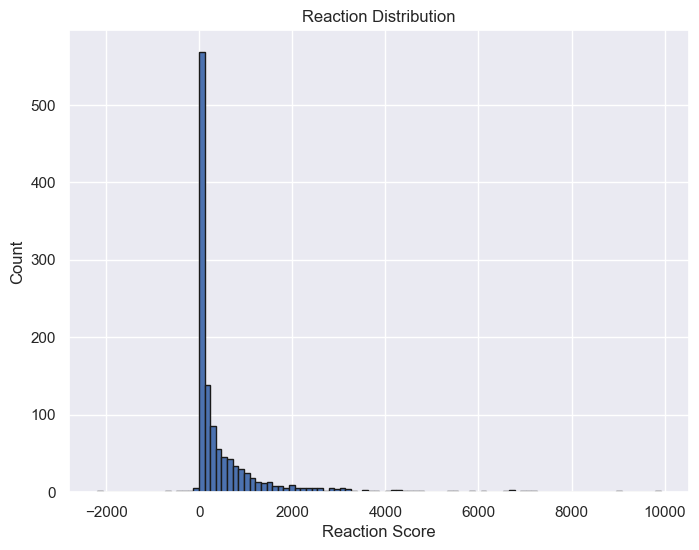

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(df_user['reactions_counts'], bins=100, edgecolor='k')
plt.title('Reaction Distribution')
plt.xlabel('Reaction Score')
plt.ylabel('Count')
plt.show()

### <a id='toc1_1_16_'></a>Tạo DataFrame từ các JSON Key, Creating a DataFrame from Selected JSON Keys [&#128522;](#toc0_)

In [18]:
with open('labels.json', encoding='utf-8') as f:
    data = json.load(f)

# Create a list of keys to include
keys_to_include = [
    "text",
    "general",
    "body",
    "display",
    "platform",
    "memory",
    "camera",
    "sound",
    "comms",
    "features",
    "misc",
    "price",
]

# Extract only the specified keys from the dictionaries
filtered_data = [{key: item.get(key, None) for key in keys_to_include} for item in data]

# Convert the filtered data to a DataFrame
df = pd.DataFrame(filtered_data)
df

,text,general,body,display,platform,memory,camera,sound,comms,features,misc,price
0,- UPDATE 5 (04/09/2021) em mới múc con pixel 4...,None,pos,neg,pos,None,pos,neg,neg,neg,None,neg
1,"quên mất, không hình đừng đú 4 3XL 3",None,None,None,None,None,None,None,None,None,None,None
2,"Xài pixel sướng , chụp hình sướng nhưng phần c...",pos,None,neg,None,None,pos,None,None,None,None,None
3,mình cũng đang định order ô tài k làm nữa nên ...,None,None,None,None,None,None,None,None,None,None,None
4,cũng đang mê pixel vãi chưởng,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1576,"5tr2 mà đc con tương đối là ngon rồi thím, Sho...",None,None,None,None,None,None,None,None,None,None,pos
1577,Vậy mà quảng cáo ầm ĩ phết. Tuy nhiên nhìn cái...,None,None,None,None,None,None,None,None,None,None,None
1578,Bác đặt bên nào thế? Họ chụp cả ảnh cho cơ à? ...,None,None,None,None,None,None,None,None,None,None,None
1579,Do cái nfc làm hao pin các ông ạ.tôi cài lại m...,None,None,None,None,None,None,None,None,None,None,None


In [19]:
df_comment = df['text'].copy()
df = df.drop('text', axis=1)
df

,general,body,display,platform,memory,camera,sound,comms,features,misc,price
0,None,pos,neg,pos,None,pos,neg,neg,neg,None,neg
1,None,None,None,None,None,None,None,None,None,None,None
2,pos,None,neg,None,None,pos,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
1576,None,None,None,None,None,None,None,None,None,None,pos
1577,None,None,None,None,None,None,None,None,None,None,None
1578,None,None,None,None,None,None,None,None,None,None,None
1579,None,None,None,None,None,None,None,None,None,None,None


### <a id='toc1_1_17_'></a>Phân tích độ dài bình luận, Analyzing Comment Length Distribution [&#128522;](#toc0_)

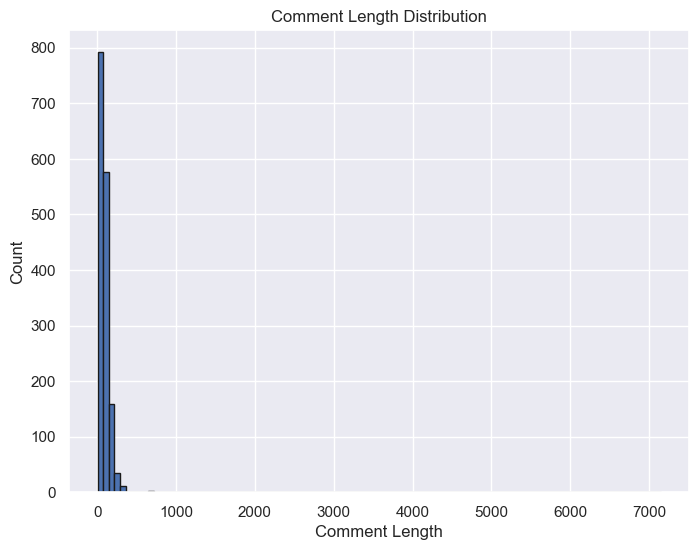

In [20]:
plt.figure(figsize=(8, 6))
plt.hist(df_comment.apply(lambda x: len(str(x))), bins=100, edgecolor='k')
plt.title('Comment Length Distribution')
plt.xlabel('Comment Length')
plt.ylabel('Count')
plt.show()

### <a id='toc1_1_18_'></a>Trực quan hóa số lượng từng danh mục, Category Distribution Visualization [&#128522;](#toc0_)

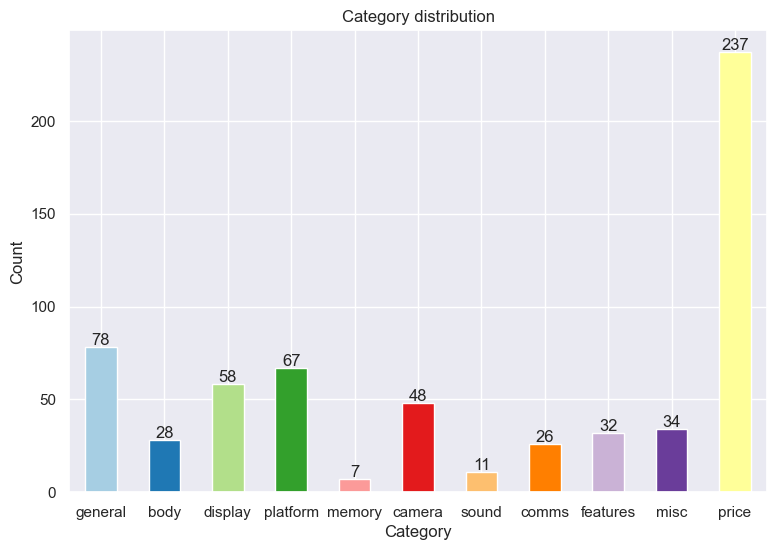

In [21]:
counts = df.count()

# Define a colormap for the bars
colors = plt.cm.Paired(np.arange(len(counts)))

# Create a bar plot with different colors
ax = counts.plot(kind='bar', figsize=(9, 6), title='Category distribution', color=colors)

# Add labels and show the plot
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add values on top of bars
for p, label in zip(ax.patches, counts):
    ax.annotate(str(label), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12)

plt.show()

### <a id='toc1_1_19_'></a>Phân phối danh mục bằng biểu đồ tròn, Category Distributions in Pie Charts [&#128522;](#toc0_)

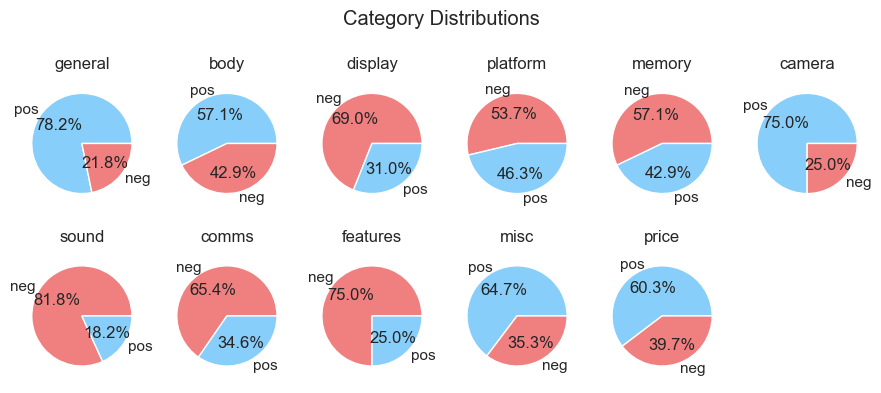

In [22]:
# Define a consistent color palette for labels
label_colors = {
    "neg": 'lightcoral',
    "pos": 'lightskyblue'
}

# Calculate the number of rows and columns for subplots
n_plots = len(df.columns)
n_rows = 2
n_cols = (n_plots + 1) // 2 # two plots per column

# Create subplots with n_rows and n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(9, 4))
fig.suptitle('Category Distributions')

# Flatten the axes array to iterate through subplots
axes = axes.flatten()

for i, col in enumerate(df.columns):
    counts = df[col].value_counts()
    labels = counts.index.tolist()
    
    # Create pie chart
    ax = axes[i]
    colors = [label_colors[label] for label in labels]
    ax.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%')
    ax.set_title(col)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Remove any unused subplots
for i in range(n_plots, n_rows * n_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

### <a id='toc1_1_20_'></a>Phân tích cân bằng các lớp bằng biểu đồ, Analyzing Class Imbalance with Charts [&#128522;](#toc0_)

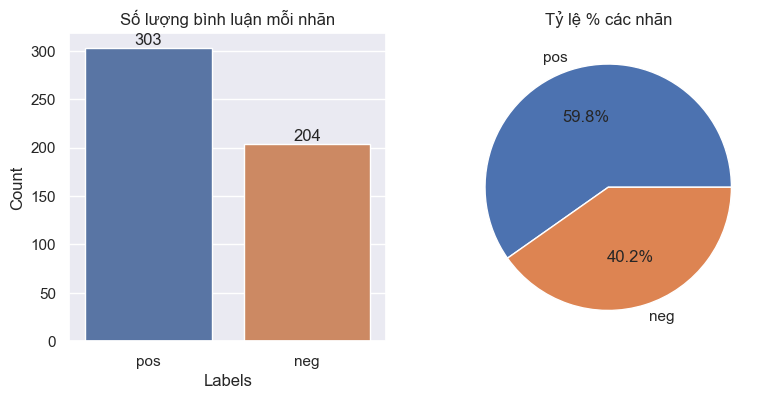

In [23]:
# read cleaned data
df = pd.read_csv("cleaned_data.csv")
# Count the number of comments for each label
label_counts = df["label"].value_counts()

fig, (ax_bar, ax_pie) = plt.subplots(ncols=2, figsize=(9, 4))

# bar plot
sns.barplot(x=label_counts.index, y=label_counts.values, ax=ax_bar)
# Add labels and title to the plot
ax_bar.set_xlabel("Labels")
ax_bar.set_ylabel("Count")
ax_bar.set_title("Số lượng bình luận mỗi nhãn")
# Add count number for each bar
for i, count in enumerate(label_counts.values):
    ax_bar.text(i, count, str(count), ha="center", va="bottom")

# pie plot
ax_pie.pie(label_counts.values, labels=label_counts.index, autopct="%1.1f%%")
ax_pie.set_title("Tỷ lệ % các nhãn")
plt.show()